In [8]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [9]:
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])

In [10]:
bridge_df

,Bridge_Types
0,Arch
1,Beam
2,Truss
3,Cantilever
4,Tied Arch
5,Suspension
6,Cable


In [11]:
bridge_df['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')

In [12]:
bridge_df['Bridge_Types_Cat'] = bridge_df['Bridge_Types'].cat.codes
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
enc = OneHotEncoder(handle_unknown='ignore')

In [15]:
enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())

In [16]:
bridge_df = bridge_df.join(enc_df)
bridge_df

,Bridge_Types,Bridge_Types_Cat,0,1,2,3,4,5,6
0,Arch,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Beam,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Truss,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Cantilever,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Tied Arch,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Suspension,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Cable,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
enc.categories_

[array([0, 1, 2, 3, 4, 5, 6], dtype=int8)]

In [18]:
from sklearn.metrics import roc_curve


In [19]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)

In [20]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [21]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [22]:
type(iris.target)

pandas.core.series.Series

In [23]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
type(iris.data)

pandas.core.frame.DataFrame

In [25]:
type(iris.target_names)

numpy.ndarray

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
x=iris.data['petal width (cm)']
x=x.values.reshape(-1,1)
x

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [28]:
iris.target_names[2]

'virginica'

In [29]:
iris.target==2

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: target, Length: 150, dtype: bool

In [30]:
y=iris.target==2
y=y.values.reshape(-1,1)
y

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [31]:
print(x.shape)

(150, 1)


In [32]:
print(y.shape)

(150, 1)


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

C:\Users\anshul\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [34]:
x_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict(x_new)

In [35]:
x_new.shape

(1000, 1)

In [36]:
y_proba=y_proba.reshape(-1,1)

In [37]:
#y_proba[:,0]

In [38]:
decision_boundry=x_new[y_proba.reshape(-1,1)>=0.5]
print(decision_boundry)

[1.65165165 1.65465465 1.65765766 1.66066066 1.66366366 1.66666667
 1.66966967 1.67267267 1.67567568 1.67867868 1.68168168 1.68468468
 1.68768769 1.69069069 1.69369369 1.6966967  1.6996997  1.7027027
 1.70570571 1.70870871 1.71171171 1.71471471 1.71771772 1.72072072
 1.72372372 1.72672673 1.72972973 1.73273273 1.73573574 1.73873874
 1.74174174 1.74474474 1.74774775 1.75075075 1.75375375 1.75675676
 1.75975976 1.76276276 1.76576577 1.76876877 1.77177177 1.77477477
 1.77777778 1.78078078 1.78378378 1.78678679 1.78978979 1.79279279
 1.7957958  1.7987988  1.8018018  1.8048048  1.80780781 1.81081081
 1.81381381 1.81681682 1.81981982 1.82282282 1.82582583 1.82882883
 1.83183183 1.83483483 1.83783784 1.84084084 1.84384384 1.84684685
 1.84984985 1.85285285 1.85585586 1.85885886 1.86186186 1.86486486
 1.86786787 1.87087087 1.87387387 1.87687688 1.87987988 1.88288288
 1.88588589 1.88888889 1.89189189 1.89489489 1.8978979  1.9009009
 1.9039039  1.90690691 1.90990991 1.91291291 1.91591592 1.918918

In [39]:
import matplotlib.pyplot as plt

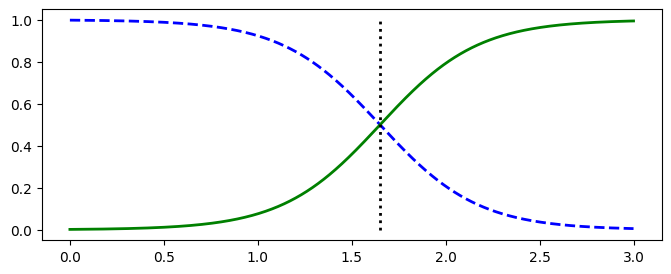

In [40]:


X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")



plt.show()




In [41]:
log_reg.predict_proba([[1.7],[1.5]])

array([[0.4529122 , 0.5470878 ],
       [0.64069097, 0.35930903]])

In [42]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

In [43]:
X.shape

(150, 2)

In [44]:
y.shape

(150,)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=2, random_state=42)

In [47]:
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))

In [48]:
X_new = np.c_[x0.ravel(), x1.ravel()] 
X_new 

array([[2.9       , 0.8       ],
       [2.90821643, 0.8       ],
       [2.91643287, 0.8       ],
       ...,
       [6.98356713, 2.7       ],
       [6.99178357, 2.7       ],
       [7.        , 2.7       ]])

In [49]:
y_proba = log_reg.predict_proba(X_new)

In [50]:
zz = y_proba[:, 1].reshape(x0.shape)

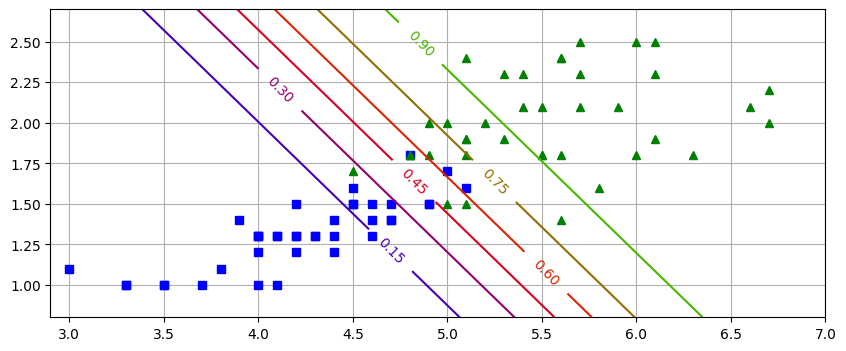

In [51]:
plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()

In [52]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [53]:
iris=load_iris(as_frame=True)
X_iris=iris.data[['petal length (cm)','petal width (cm)']].values
y_iris=iris.target

In [54]:
tree_clf=DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(x_iris,y_iris)

NameError: name 'x_iris' is not defined

In [55]:


from sklearn.tree import export_graphviz

In [56]:
export_graphviz(tree_clf,out_file='iris.dot',feature_names=['petal length (cm)','petal width (cm)'],class_names=iris.target_names,rounded=True,filled=True)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

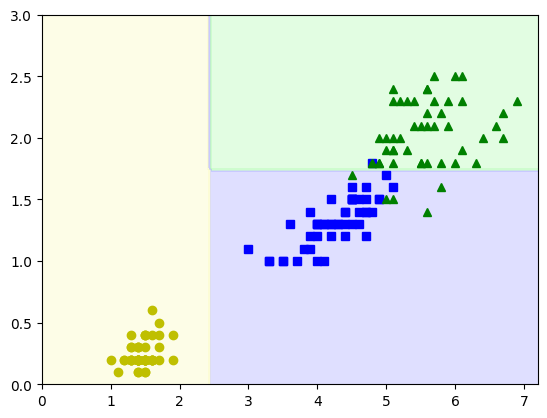

In [ ]:
lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],style, label=f"Iris {name}")


In [ ]:
tree_clf.tree_

In [ ]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [ ]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

In [57]:
plot_decision_boundary(tree_clf,X_train, y_train, cmap='Paired_r')

NameError: name 'plot_decision_boundary' is not defined

In [58]:
from sklearn.datasets import make_moons
x_moons,y_moons=make_moons(n_samples=150,noise=0.2,random_state=42)

In [59]:
tree_clf1=DecisionTreeClassifier(random_state=42)
tree_clf2=DecisionTreeClassifier(min_samples_leaf=5,random_state=42)
tree_clf1.fit(x_moons,y_moons)
tree_clf2.fit(x_moons,y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [60]:
plot_decision_boundary(tree_clf1,x_moons,y_moons, cmap='Paired_r')

NameError: name 'plot_decision_boundary' is not defined

In [61]:
plot_decision_boundary(tree_clf2,x_moons,y_moons, cmap='Paired_r')

NameError: name 'plot_decision_boundary' is not defined

In [62]:
from sklearn.datasets import fetch_openml
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mnist=fetch_openml('mnist_784',as_frame=True)

C:\Users\anshul\AppData\Roaming\Python\Python310\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [63]:
x_train,y_train=mnist.data[:60_000],mnist.target[:60_000]
x_test,y_test=mnist.data[60_000:],mnist.target[60_000:]

In [64]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x_reduced=pca.fit_transform(x_train)

In [65]:
pca.n_components_

154

In [68]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 

154

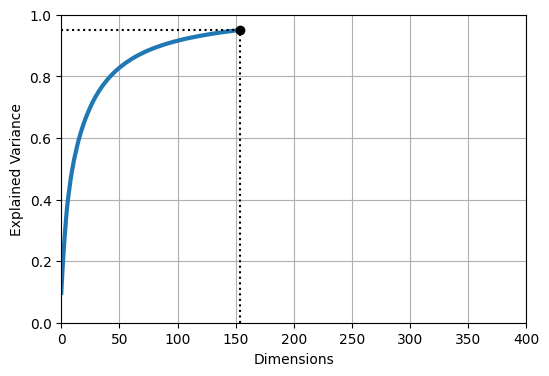

In [77]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
#plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),arrowprops=dict(arrowstyle="->"))
plt.grid(True)

plt.show()

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

In [79]:
clf=make_pipeline(PCA(random_state=42),RandomForestClassifier(random_state=42))

In [94]:
param_distrib={'pca__n_components':np.arange(10,80),
               'randomforestclassifier__n_estimators':np.arange(50,500)}

In [95]:
rnd_search=RandomizedSearchCV(clf,param_distrib,n_iter=10,cv=3,random_state=42)

In [96]:
rnd_search.fit(x_train[:1000],y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [84]:
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}


In [97]:
from sklearn.decomposition import IncrementalPCA

In [98]:
filename='my_mnist.mmap'
x_mmap=np.memmap(filename,dtype='float32',mode='write',shape=x_train.shape)
x_mmap[:]=x_train
x_mmap.flush()

In [99]:
x_mmap=np.memmap(filename,dtype='float32',mode='readonly').reshape(-1,784)
n_batches=100

batch_size=x_mmap.shape[0]//n_batches
inc_pca=IncrementalPCA(n_components=154,batch_size=batch_size)
inc_pca.fit(x_mmap)

IncrementalPCA(batch_size=600, n_components=154)